In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '..')
from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.make_comparison_panel import make_comparison_panel

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11e968840> (1 process) ...
Computing MoEs with 10 samplings ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...


,Score,0.95 MoE,P-Value,FDR
Gene Set,,,,
GO_14_3_3_PROTEIN_BINDING,0.523070,0.259900,0.100000,0.366667
ONGUSAHA_TP53_TARGETS,0.188894,0.231043,0.455556,0.820000
GO_NEURON_CELL_CELL_ADHESION,-0.658196,0.167719,0.033333,0.150000
GO_SH2_DOMAIN_BINDING,0.396716,0.210557,0.122222,0.366667
YAP signature based on cell NIH3T3_MCD10A in paper GENES & DEVELOPMENT 22:1962–1971 2008,0.865167,0.160649,0.011111,0.100000
YAP signature based on mechanism,-0.865856,0.173882,0.011111,0.100000
BIOCARTA_RHO_PATHWAY,-0.373638,0.185910,0.100000,0.225000
VANTVEER_BREAST_CANCER_BRCA1_UP,-0.404066,0.258884,0.077778,0.225000
"YAP signature based on cell HEK293 in paper Cell 150, 780–791, August 17, 2012",0.283160,0.246852,0.300000,0.675000


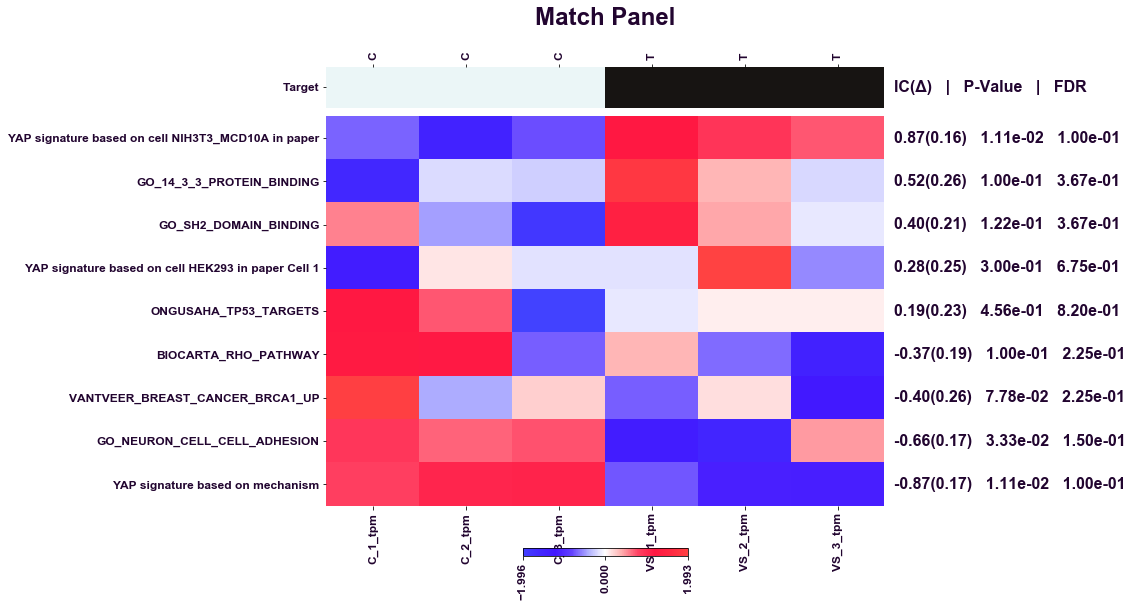

In [3]:
features = pd.read_table('gene_set_x_sample.tsv', index_col=0)

target = pd.Series(
    (0, ) * 3 + (1, ) * 3, name='Target', index=features.columns)
target.index.name = 'Index Name (should not be plotted)'

make_match_panel(
    target,
    features,
    target_ascending=True,
    cluster_within_category=False,
    target_type='binary',
    n_sampling=10,
    n_permutation=10,
    target_xticklabels=('C', ) * 3 + ('T', ) * 3,
    plot_column_names=True)

In [ ]:
target = pd.read_table('target.tsv', index_col=0, header=None, squeeze=True)
target.name = 'Target Name'

features = pd.read_table('features.tsv', index_col=0)

make_match_panel(
    target, features, min_n_sample=3, n_top_feature=3, max_n_feature=5)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x11e968840> (1 process) ...


../match/nd_array/nd_array/check_nd_array_for_bad_value.py:27: UserWarning: nd_array has 6 bad values (nan).
  warn(message)
../match/nd_array/nd_array/check_nd_array_for_bad_value.py:27: UserWarning: nd_array has 2 bad values (nan).
  warn(message)
../match/nd_array/nd_array/check_nd_array_for_bad_value.py:27: UserWarning: nd_array has 10 bad values (nan).
  warn(message)
../match/nd_array/nd_array/check_nd_array_for_bad_value.py:27: UserWarning: nd_array has 1 bad value (nan).
  warn(message)


In [ ]:
n_row = 100
n_column = 100

In [ ]:
target = pd.Series(
    np.random.random_sample(n_column),
    name='Target Name',
    index=('Sample {}'.format(i) for i in range(n_column)))

features_continuous = pd.DataFrame(
    np.random.random_sample((n_row, n_column)),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_continuous)

In [ ]:
features_categorical = pd.DataFrame(
    np.random.random_integers(0, 5, size=(n_row, n_column)),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_categorical, features_type='categorical')

In [ ]:
features_binary = pd.DataFrame(
    np.random.random_integers(0, 1, size=(n_row, n_column)),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_binary, features_type='binary')

In [ ]:
features_with_missing = features_continuous.copy()
features_with_missing.loc[
    np.random.choice(features_with_missing.index, size=n_column // 3),
    np.random.choice(features_with_missing.columns, size=n_column // 3)] = None

make_match_panel(target, features_with_missing)

In [ ]:
features = pd.DataFrame(
    np.random.random_sample((n_row, 9)),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(9)))

target = pd.Series(
    (0, 0, 0, 1, 1, 1, 0, 0, 0), name='Target Name', index=features.columns)

make_match_panel(
    target,
    features,
    target_ascending=None,
    cluster_within_category=True,
    target_type='binary',
    min_n_sample=3,
    target_xticklabels=('Low', 'Low', 'Low', 'High', 'High', 'High', 'Low',
                        'Low', 'Low'),
    plot_column_names=True)

In [ ]:
target = pd.Series(
    np.random.random_sample(n_column),
    name='Target Name',
    index=('Sample {}'.format(i) for i in range(n_column)))

features_continuous = pd.DataFrame(
    np.random.random_sample((n_row, n_column)),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

n = 3

multiple_features = {
    'Continuous features': {
        'df': features_continuous.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'continuous'
    },
    'Categorical features': {
        'df': features_categorical.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'categorical'
    },
    'Binary features': {
        'df': features_binary.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'binary'
    },
    'Cotinuous features (missing last 10 & scores ascending)': {
        'df': features_continuous.iloc[:n, :-10],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'low',
        'data_type': 'continuous'
    },
    'Cotinuous features (missing first 10 & scores ascending)': {
        'df': features_continuous.iloc[:n, 10:],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'low',
        'data_type': 'continuous'
    },
}

In [ ]:
make_summary_match_panel(
    target, multiple_features, title='Default', plot_column_names=True)

In [ ]:
make_summary_match_panel(
    target,
    multiple_features,
    plot_only_columns_shared_by_target_and_all_features=True,
    title='Only Columns Shared by Target and All Features',
    plot_column_names=True)

In [ ]:
array_2d_0 = np.random.random_sample((n_row, 2))

array_2d_1 = np.random.random_sample((n_row, 8))

make_comparison_panel(
    array_2d_0,
    array_2d_1,
    array_2d_0_name='ND Array 0',
    array_2d_1_name='ND Array 1')